# Data handling in Python

*Thursday, September 19*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arnauddyevre/Python-for-Social-Scientists/blob/master/statistics_and_econometrics/data_handling/data_handling.ipynb)

## Contents

- [1. Introduction](#1.-Introduction)
- [2. Numpy](#2.-Numpy)
- [3. Panda](#3.-Panda) 
- [4. Matplotlib](#4.-Matplotlib)
- [5. Scipy](#5.-Matplotlib)
  

### 1. Introduction

Python is a simple programming language that would be rather unexciting by itself. For researchers, its appeal comes from the vast and endlessly growing collection of packages with which you can do pretty much anything you want. Packages, libraries or modules (these terms are synonyms) are user-written lists of Python functions helping you do whatever you may want to achieve without requiring you to code your own functions.

There are 4 essential modules for empirical quantitative projects: **NumPy**, **SciPy**, **pandas** and **matplotlib**. they all serve different purposes.
* **NumPy**, for mathematical functions and scientific computing
* **SciPy**, for more advanced mathematical computations
* **pandas** (shorthand for "panel data") for data manipulation
* **matplotlib**, for graphs

Beyond these common modules, , we will use two other Python packages later in the course: **statsmodels** and **scikit-learn**. 
* **statsmodels** provides functions for the estimation of most statistical models, statistical tests and descriptive statistics social scientists may be interested in. It generates outputs that are similar to Stata and R's. **statsmodels** is heavily dependent on your data being structured with **panda** dataframes.
* **scikit-learn** offers off-the-shelf functions for data mining and machine learning. It builds on **NumPy**, **SciPy** and **matplotlib**. Classification or supervised learning, clustering or unsupervised learning, dimensionality reduction and model selection can all be performed with **scikit-learn**.

**To summarise.** In the beginning of each Notebook or Python script, you will need to import the modules you will use. It is helpful to give short names to the modules in order to call them more easily later. To import and name modules, just follow use the syntax shown below

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mp

import statsmodels as sm
import sklearn as sl

You can call the function `help()` to get more information about a function. For instance, if we need explanations about NumPy's random number generator, we run

In [2]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should all be positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Notes
    -----
    This is a convenience function. If you want an interface that
    takes a shape-tuple as the first argument, refer to
    np.random.random_sample .
    
    Examples
    --------
    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
           [ 0.49313049,  0.94909878]]

To know all the functions of a module, write the module name followed by a `.`, then press `TAB`. An autocomplete menu will appear. You can do the same with a function, and the menu will suggest all the different options of that function.

In [ ]:
np.
np.random.

### 2. Numpy

See the "Introduction to Python" notebook.

### 3. Panda

We will manipulate two objects when doing research with structured data in Pandas: **Series** and **Dataframes**. 

#### 3.1. Series

##### 3.1.1. Basics

Series are lists of integers, floats, booleans or strings. By default, the values are indexed by integers starting from 0. <span style="color:Red"> MATLAB users beware </span>, indexation does not start with 1 here. But you can define your own index scheme by adding `index=list('abcdef')` as an option to `Series()`. We define a few series below to illustrate their properties.

In [3]:
S1 = pd.Series([1, 1, 2, 3, 4, 5])
S2 = pd.Series([0, 0.2 , 0.4, 0.6, 0.8, 1])
S3 = pd.Series([1, 0.8, 0.6, 0.4, 0.2, 0] ,index=list('abcdef'))
S4 = pd.Series(['hello','world','byebye'])
S5 = pd.Series([True, False, True, False])
S6 = pd.Series([0, 0.2, 'hello', True])

You can see the content and the indices of a series by typing their names and running the code.

In [4]:
S1

0    1
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [5]:
S2, S3, S4, S5, S6

(0    0.0
 1    0.2
 2    0.4
 3    0.6
 4    0.8
 5    1.0
 dtype: float64, a    1.0
 b    0.8
 c    0.6
 d    0.4
 e    0.2
 f    0.0
 dtype: float64, 0     hello
 1     world
 2    byebye
 dtype: object, 0     True
 1    False
 2     True
 3    False
 dtype: bool, 0        0
 1      0.2
 2    hello
 3     True
 dtype: object)

##### 3.1.2. Indexing

You can get access to each value of a series separately. You can also extract a section of the series through a selection of their indices, or if they satisfy a given condition. 
See examples below.

In [6]:
S4.values       # display all the values of S4
S3.index        # display indices of S3
S5[0]           # first value of S5
S5[:]           # all values of S5
S5[1:3]         # 3 first values of  S5
S2[[5, 3, 1]]   # values of S2 indexed by 5, 3 and 1
S3[['f', 'b']]  # value of S3 indexed by g and b
S3 > 0.5        # returns a series of booleans, resulting from evaluating the condition at each value of S3
S3[S3 > 0.5]    # only returns the values of S3 satisfying the condition

a    1.0
b    0.8
c    0.6
dtype: float64

##### 3.1.3. Functions of Series

Some Series function can be useful. See below.

In [7]:
S1.size           # returns the number of values (scalar)
S1.prod()         # product of all values (scalar)
S1.sum()          # sum of all values (scalar)
S1.cumsum()       # sumulative sum (vector)
S1.max()          # maximum (scalar)
S1.idxmax()       # maximum index (scalar)
S2.round()        # series rounded to the nearest integer (float vector)
np.ceil(S2)       # series rounded up (float vector)
np.floor(S2)      # series rounded down (float vector)
S1.unique()       # series of unique values
S3.sort_values()  # values sorted in ascending order
S1.sort_index(ascending=False)  # sort in descending order of indices
S1.isin([1,3,5,7,9])            # returns series of booleans equal to "True" if the value is in the list of values provided

0     True
1     True
2    False
3     True
4    False
5     True
dtype: bool

##### 3.1.4. Missing values

In Pandas, a missing value is coded `NaN` for "Not a Number". It is also the result given by Python after a forbidden mathematical operation such as

In [8]:
np.sqrt(-2)

/Users/arnauddyevre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

Note that SciPy will return a complex number when treating the same operation: $i\sqrt{2}$.

In [9]:
sp.sqrt(-2)

1.4142135623730951j

The count function does not count `NaN` as values. Let's see how, by replacing a value in a series by a forbidden mathematical operation.

In [10]:
S1.count()

6

In [11]:
S1[1] = np.inf - np.inf
S1.count()

5

In [12]:
S1

0    1.0
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

Note that the `size` function still counts 6 elements as it returns the number of missing and non-missing values.

The function `isnull()` returns a series of boolean equals to `True` if the value of the original series is not `NaN` and `False` otherwise.

In [13]:
S1.isnull()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

When cleaning data in Python, we can delete all the `NaN` of a Series with the `dropna` function. This delete the missing values, yet it keep the old indexation.

In [14]:
S1 = S1.dropna()
S1

0    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

#### 3.2. Data frames

##### 3.2.1. Basics

In Pandas, a data frame is simply a table of structured data, with variables as columns and observations as rows. Each column can have a **label** that we can simply assimilate to a variable name here. By default, observations are indexed by integers, starting from 0, but we can re-index observations at will.

We create below a data frame of 10 observations of 3 random numbers from the uniform distribution in $[0, 1)$

In [15]:
randomTable = pd.DataFrame(np.random.rand(10,3), columns = pd.Series(["Number 1", "Number 2", "Number 3"]) )
randomTable

,Number 1,Number 2,Number 3
0,0.649796,0.936636,0.261380
1,0.790453,0.491862,0.115862
2,0.410883,0.299183,0.324256
3,0.658176,0.920241,0.196261
4,0.601911,0.852336,0.036874
5,0.204363,0.668845,0.810040
6,0.950209,0.160509,0.577735
7,0.657089,0.848429,0.722300
8,0.499170,0.163025,0.252959
9,0.696059,0.171905,0.096257


##### 3.2.2. Indexing

We can index the rows differently, for instance by making them start from 1. To do so, we define a Pandas Series and define it as the index.

In [16]:
obs = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
obs

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

In [17]:
randomTable = randomTable.set_index(obs)
randomTable

,Number 1,Number 2,Number 3
1,0.649796,0.936636,0.261380
2,0.790453,0.491862,0.115862
3,0.410883,0.299183,0.324256
4,0.658176,0.920241,0.196261
5,0.601911,0.852336,0.036874
6,0.204363,0.668845,0.810040
7,0.950209,0.160509,0.577735
8,0.657089,0.848429,0.722300
9,0.499170,0.163025,0.252959
10,0.696059,0.171905,0.096257


##### 3.2.3. Column names

We can add variable names by creating a list.

In [18]:
columnNames = pd.Series(["A", "B", "C"])
randomTable.columns = columnNames
randomTable

,A,B,C
1,0.649796,0.936636,0.261380
2,0.790453,0.491862,0.115862
3,0.410883,0.299183,0.324256
4,0.658176,0.920241,0.196261
5,0.601911,0.852336,0.036874
6,0.204363,0.668845,0.810040
7,0.950209,0.160509,0.577735
8,0.657089,0.848429,0.722300
9,0.499170,0.163025,0.252959
10,0.696059,0.171905,0.096257


Let's rename variables separately, just like with STATA's `rename` function. Here we are renaming variables using a mapping from old names to new names. This mapping is called a **dictionary**; it is the way Python associate a **key** --like a word in a dictionary-- to a **value** --the definition of the word.
The basic structure of a dictionary is `{"key 1": "value 1", "key 2": "value 2", ... , "key N": "value N"}` 

In [19]:
randomTable = randomTable.rename(columns={"A": "a"})
randomTable

,a,B,C
1,0.649796,0.936636,0.261380
2,0.790453,0.491862,0.115862
3,0.410883,0.299183,0.324256
4,0.658176,0.920241,0.196261
5,0.601911,0.852336,0.036874
6,0.204363,0.668845,0.810040
7,0.950209,0.160509,0.577735
8,0.657089,0.848429,0.722300
9,0.499170,0.163025,0.252959
10,0.696059,0.171905,0.096257


Similarly, we can rename several columns at once, just by defining a bigger dictionary.

In [20]:
randomTable = randomTable.rename(columns={"B": "b", "C": "c"})
randomTable

,a,b,c
1,0.649796,0.936636,0.261380
2,0.790453,0.491862,0.115862
3,0.410883,0.299183,0.324256
4,0.658176,0.920241,0.196261
5,0.601911,0.852336,0.036874
6,0.204363,0.668845,0.810040
7,0.950209,0.160509,0.577735
8,0.657089,0.848429,0.722300
9,0.499170,0.163025,0.252959
10,0.696059,0.171905,0.096257


We can rename indices similarly:

In [21]:
randomTable = randomTable.rename(index={1: "One", 2: "Two"})
randomTable

,a,b,c
One,0.649796,0.936636,0.261380
Two,0.790453,0.491862,0.115862
3,0.410883,0.299183,0.324256
4,0.658176,0.920241,0.196261
5,0.601911,0.852336,0.036874
6,0.204363,0.668845,0.810040
7,0.950209,0.160509,0.577735
8,0.657089,0.848429,0.722300
9,0.499170,0.163025,0.252959
10,0.696059,0.171905,0.096257


We can define data frames more explicitely, by defining each variable as a label and a series.

In [22]:
syllabus = pd.DataFrame({ 'Date' : pd.date_range('20190916', '20190927'),   # creates a series of dates from 16/09/2019 to 27/09/2019
    'Topic' : pd.Categorical(["Version control","Cloud computing","Intro to Python","Basics of data handling","OLS, GLS, IV and NLLS","WEEKEND","WEEKEND","MLE","Time Series","-No class-","Intro to machine learning 1","Intro to machine learning 2"]), # string variable of topics
    'Alphabetical index' : list('abcdefghijkl'),                            # another index, defined as a list
    'Numerical index' : np.linspace(1, 12, 12)   })                         # another index, defined with a useful NumPy function

syllabus

,Date,Topic,Alphabetical index,Numerical index
0,2019-09-16,Version control,a,1.0
1,2019-09-17,Cloud computing,b,2.0
2,2019-09-18,Intro to Python,c,3.0
3,2019-09-19,Basics of data handling,d,4.0
4,2019-09-20,"OLS, GLS, IV and NLLS",e,5.0
5,2019-09-21,WEEKEND,f,6.0
6,2019-09-22,WEEKEND,g,7.0
7,2019-09-23,MLE,h,8.0
8,2019-09-24,Time Series,i,9.0
9,2019-09-25,-No class-,j,10.0


##### 3.2.4. Functions on data frames

See below some useful data frame functions:

In [23]:
randomTable.shape              # To get the dimensions of the data frame
list(randomTable)              # To get a series containing the variable names
randomTable.columns            # To get a series containing the variable names and their data type
randomTable.index              # To get a series containing the indices and their data types
syllabus.dtypes                # To get the types of data objects in the table
syllabus.head(4)               # To display the first 4 obs of the frame (5 by default if no argument entered in head() )
syllabus.tail(3)               # To display the last 3 obs of the fram (5 by default)
syllabus.values                # To get all values of the dataframe as an array of arrays (basically an array of rows)
randomTable.describe()         # generates summary statistics about the valiables

,a,b,c
count,10.000000,10.000000,10.000000
mean,0.611811,0.551297,0.339393
std,0.205031,0.331970,0.270761
min,0.204363,0.160509,0.036874
25%,0.524855,0.203725,0.135962
50%,0.653442,0.580354,0.257169
75%,0.686588,0.851359,0.514366
max,0.950209,0.936636,0.810040


##### 3.2.5. Acessing elements of a data frame

To extract columns from dataframe, we simply use:

In [24]:
randomTable[['a', 'b']]

,a,b
One,0.649796,0.936636
Two,0.790453,0.491862
3,0.410883,0.299183
4,0.658176,0.920241
5,0.601911,0.852336
6,0.204363,0.668845
7,0.950209,0.160509
8,0.657089,0.848429
9,0.499170,0.163025
10,0.696059,0.171905


To extract observations, we can use row numbers, indices and conditions on values.

In [25]:
randomTable[0:2]
randomTable.index

Index(['One', 'Two', 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [26]:
randomTable['One': 'Two']

,a,b,c
One,0.649796,0.936636,0.261380
Two,0.790453,0.491862,0.115862


In [27]:
randomTable[randomTable['a'] >= 0.5]   # Extracts all observations whose a is greater than, or equal to 0.5

,a,b,c
One,0.649796,0.936636,0.261380
Two,0.790453,0.491862,0.115862
4,0.658176,0.920241,0.196261
5,0.601911,0.852336,0.036874
7,0.950209,0.160509,0.577735
8,0.657089,0.848429,0.722300
10,0.696059,0.171905,0.096257


More sophisticated selections, combining conditions on rows and columns, can be extracted from a dataframe with the **.loc** and **.iloc** functions.
* **.loc** takes as arguments indices for rows and labels for columns
* **.iloc** takes as arguments integers for rows and columns

In [28]:
randomTable.loc['One': 'Two', ['a', 'b']]
randomTable.iloc[0: 4, 0: 2]

,a,b
One,0.649796,0.936636
Two,0.790453,0.491862
3,0.410883,0.299183
4,0.658176,0.920241


These selectors also accept boolean tests.

In [29]:
randomTable.loc[randomTable['a'] >= 0.5, ['b', 'c']]

,b,c
One,0.936636,0.261380
Two,0.491862,0.115862
4,0.920241,0.196261
5,0.852336,0.036874
7,0.160509,0.577735
8,0.848429,0.722300
10,0.171905,0.096257


In [30]:
syllabus.loc[syllabus['Topic'] == 'WEEKEND', ['Date']]

,Date
5,2019-09-21
6,2019-09-22


##### 3.2.6. Adding data to a data frame

We can add a column and populate it with a given value:

In [31]:
randomTable['d'] = np.pi      # adds a column with the value of pi
randomTable

,a,b,c,d
One,0.649796,0.936636,0.261380,3.141593
Two,0.790453,0.491862,0.115862,3.141593
3,0.410883,0.299183,0.324256,3.141593
4,0.658176,0.920241,0.196261,3.141593
5,0.601911,0.852336,0.036874,3.141593
6,0.204363,0.668845,0.810040,3.141593
7,0.950209,0.160509,0.577735,3.141593
8,0.657089,0.848429,0.722300,3.141593
9,0.499170,0.163025,0.252959,3.141593
10,0.696059,0.171905,0.096257,3.141593


In [32]:
randomTable['e'] = np.linspace(1, 10, 10)  # adds a 'e' column with floats randging from 1 to 10, separated by increments of 1.0
randomTable

,a,b,c,d,e
One,0.649796,0.936636,0.261380,3.141593,1.0
Two,0.790453,0.491862,0.115862,3.141593,2.0
3,0.410883,0.299183,0.324256,3.141593,3.0
4,0.658176,0.920241,0.196261,3.141593,4.0
5,0.601911,0.852336,0.036874,3.141593,5.0
6,0.204363,0.668845,0.810040,3.141593,6.0
7,0.950209,0.160509,0.577735,3.141593,7.0
8,0.657089,0.848429,0.722300,3.141593,8.0
9,0.499170,0.163025,0.252959,3.141593,9.0
10,0.696059,0.171905,0.096257,3.141593,10.0


##### 3.2.7. Sorting values in a data frame

We can sort the table by the values of a variable or of several variables.

In [33]:
randomTable.sort_values(by= 'a')
randomTable.sort_values(by= ['a', 'e'])

,a,b,c,d,e
6,0.204363,0.668845,0.810040,3.141593,6.0
3,0.410883,0.299183,0.324256,3.141593,3.0
9,0.499170,0.163025,0.252959,3.141593,9.0
5,0.601911,0.852336,0.036874,3.141593,5.0
One,0.649796,0.936636,0.261380,3.141593,1.0
8,0.657089,0.848429,0.722300,3.141593,8.0
4,0.658176,0.920241,0.196261,3.141593,4.0
10,0.696059,0.171905,0.096257,3.141593,10.0
Two,0.790453,0.491862,0.115862,3.141593,2.0
7,0.950209,0.160509,0.577735,3.141593,7.0


We can also sort by index of observation (`axis=0`), or by index of variable (`axis=1`).

In [34]:
syllabus.sort_index(axis=0, ascending=False)

,Date,Topic,Alphabetical index,Numerical index
11,2019-09-27,Intro to machine learning 2,l,12.0
10,2019-09-26,Intro to machine learning 1,k,11.0
9,2019-09-25,-No class-,j,10.0
8,2019-09-24,Time Series,i,9.0
7,2019-09-23,MLE,h,8.0
6,2019-09-22,WEEKEND,g,7.0
5,2019-09-21,WEEKEND,f,6.0
4,2019-09-20,"OLS, GLS, IV and NLLS",e,5.0
3,2019-09-19,Basics of data handling,d,4.0
2,2019-09-18,Intro to Python,c,3.0


##### 3.2.7. Importing a structured dataset

Pandas can read most structured data formats: .csv, Excel and SQL being the most common. We use the function `pd.read_csv` to import a CSV file into a data frame. We can indicate which delimiter to use, if the data is compressed or not, and if Python needs to skip a header in the original file. See below two imports we will use in the next section.

In [35]:
top1Percent = pd.read_excel('http://gabriel-zucman.eu/files/Zucman2019Data.xlsx', sheet_name='DataF4', header=2, squeeze=True)
top10Percent = pd.read_excel('http://gabriel-zucman.eu/files/Zucman2019Data.xlsx', sheet_name='DataF5', header=2, squeeze=True)

In [36]:
top10Percent

,Year,China,France,Russian Federation,United Kingdom,USA
0,1910,NaN,NaN,NaN,NaN,NaN
1,1911,NaN,NaN,NaN,NaN,NaN
2,1912,NaN,NaN,NaN,NaN,NaN
3,1913,NaN,0.849030,NaN,0.925733,NaN
4,1914,NaN,0.849074,NaN,0.929655,NaN
5,1915,NaN,0.843429,NaN,NaN,NaN
6,1916,NaN,0.843037,NaN,NaN,NaN
7,1917,NaN,0.842252,NaN,NaN,0.782449
8,1918,NaN,0.838413,NaN,NaN,0.785049
9,1919,NaN,0.833341,NaN,0.885341,0.800170


##### 3.2.8. Appending and merging

Pandas is very efficient at performing join operation, it is over an order of magnitude faster than R in some cases according to [the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging). This is both due to the clever design of pandas' merging algorithms, and inherently efficient structure of data frames.

Merging data frames or series by rows is done with Pandas' `merge` function. The two datasets we need to merge are called **left** and **right**, and a `merge` call creates either a left, right, inner or outer join:
* with a left join, only rows from the left dataset are kept
* right join = only rows from the right dataset
* inner join = only rows from both datasets (default option)
* outer join = all rows, with non-existing values filled with `NaN`

The `merge` function takes the following important arguments:
* a 'left' data frame
* a 'right' data frame
* a type of join, entered as an argument for after `how=`
* keys for the join. If the columns or indices used for the merge are similarly named in both datasets then a single key name can be passed to the `merge` function as `on=`. If they differ in both datasets, then we use `left_on=` and `right_on=`.
* `sort = True` if we want the merged data frame to be sorted. Set to `False` for improved performance
* `indicator = True` to create a new column to the merged data frame called `_merge`. The column takes the values `left_only`, `right_only` or `both` depending on the availability of keys in the data frames

In what follows, we set the years as indices for the observations in our data frame, we create a multi-index for the column and merge the two data frames. The multi-indexing of the columns allows us to then merge the two data frames without renaming columns.

In [37]:
# Re-indexing Top 1% data set
top1Percent_reIndex = top1Percent.set_index(['Year'])
top1Percent_reIndex

,China,France,Russia,UK,US
Year,,,,,
1910,NaN,NaN,NaN,NaN,NaN
1911,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,NaN,NaN
1913,NaN,0.545610,NaN,0.665846,NaN
1914,NaN,0.545639,NaN,0.672140,NaN
1915,NaN,0.540021,NaN,NaN,NaN
1916,NaN,0.537610,NaN,NaN,NaN
1917,NaN,0.534866,NaN,NaN,0.405009
1918,NaN,0.528085,NaN,NaN,0.370107


In [38]:
# Re-indexing Top 10% data set
top10Percent_reIndex = top10Percent.set_index(['Year'])
top10Percent_reIndex

,China,France,Russian Federation,United Kingdom,USA
Year,,,,,
1910,NaN,NaN,NaN,NaN,NaN
1911,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,NaN,NaN
1913,NaN,0.849030,NaN,0.925733,NaN
1914,NaN,0.849074,NaN,0.929655,NaN
1915,NaN,0.843429,NaN,NaN,NaN
1916,NaN,0.843037,NaN,NaN,NaN
1917,NaN,0.842252,NaN,NaN,0.782449
1918,NaN,0.838413,NaN,NaN,0.785049


In [39]:
# We need to do a bit of renaming to homogenise variable names across datasets, this part is not really important
top10Percent_reIndex = top10Percent_reIndex.rename(columns={"Russian Federation": "Russia", "United Kingdom": "UK", "USA": "US"})

# Creating a MultiIndex for the top 10% dataset
top10Percent_reIndex.columns = pd.MultiIndex.from_tuples([('Top 10%', c) for c in top10Percent_reIndex.columns])

# What the nested indices look like
top10Percent_reIndex.columns

MultiIndex(levels=[['Top 10%'], ['China', 'France', 'Russia', 'UK', 'US']],
           codes=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]])

In [40]:
# What the new data frame looks like
top10Percent_reIndex

Top 10%                                        
         China    France    Russia        UK        US
Year                                                  
1910       NaN       NaN       NaN       NaN       NaN
1911       NaN       NaN       NaN       NaN       NaN
1912       NaN       NaN       NaN       NaN       NaN
1913       NaN  0.849030       NaN  0.925733       NaN
1914       NaN  0.849074       NaN  0.929655       NaN
1915       NaN  0.843429       NaN       NaN       NaN
1916       NaN  0.843037       NaN       NaN       NaN
1917       NaN  0.842252       NaN       NaN  0.782449
1918       NaN  0.838413       NaN       NaN  0.785049
1919       NaN  0.833341       NaN  0.885341  0.800170
1920       NaN  0.822932       NaN  0.879738  0.780308
1921       NaN  0.815696       NaN  0.881781  0.779401
1922       NaN  0.809572       NaN  0.888246  0.791782
1923       NaN  0.804844       NaN  0.883304  0.796282
1924       NaN  0.803360       NaN  0.879293  0.810724
1925       NaN  0.786832       NaN  0.881648  0.821536
1926       NaN  0.787089       NaN  0.872117  0.830990
1927       NaN  0.798049       NaN  0.879828  0.841124
1928       NaN       NaN       NaN  0.866827  0.843926
1929       NaN  0.802657       NaN  0.870702  0.843327
1930       NaN  0.802256       NaN  0.861311  0.845685
1931       NaN  0.787573       NaN  0.858074  0.843043
1932       NaN  0.779655       NaN  0.857418  0.847409
1933       NaN  0.781155       NaN  0.864071  0.845613
1934       NaN       NaN       NaN  0.861166  0.829752
1935       NaN  0.772239       NaN  0.858730  0.816211
1936       NaN  0.766867       NaN  0.851632  0.821281
1937       NaN  0.763813       NaN  0.854700  0.802343
1938       NaN  0.747334       NaN  0.850125  0.799010
1939       NaN  0.755728       NaN  0.842894  0.802181
...        ...       ...       ...       ...       ...
1986       NaN  0.505658       NaN  0.488240  0.606497
1987       NaN  0.504989       NaN  0.503588  0.615782
1988       NaN  0.504901       NaN  0.481854  0.627376
1989       NaN  0.507558       NaN  0.485264  0.627007
1990       NaN  0.502717       NaN  0.459857  0.628830
1991       NaN  0.506542       NaN  0.455891  0.627435
1992       NaN  0.510053       NaN  0.479958  0.642536
1993       NaN  0.512132       NaN  0.498296  0.645715
1994       NaN  0.511994       NaN  0.495453  0.646331
1995  0.408106  0.511167  0.525537  0.469170  0.650016
1996  0.430038  0.540069  0.544091  0.483788  0.654424
1997  0.446414  0.552385  0.595655  0.515730  0.659853
1998  0.459108  0.563284  0.624042  0.518868  0.668028
1999  0.469236  0.568759  0.657416  0.500720  0.670313
2000  0.477504  0.570562  0.646475  0.505551  0.673758
2001  0.484382  0.561083  0.667414  0.502400  0.664474
2002  0.490194  0.546057  0.643013  0.508456  0.663484
2003  0.490297  0.538409  0.667090  0.502553  0.665587
2004  0.506145  0.529699  0.670242       NaN  0.673698
2005  0.522943  0.523728  0.657116  0.511891  0.674178
2006  0.539353  0.528147  0.638349  0.519773  0.679792
2007  0.558198  0.535888  0.638570       NaN  0.690305
2008  0.569170  0.532034  0.664426       NaN  0.719994
2009  0.582027  0.540526  0.628777  0.540135  0.727669
2010  0.627582  0.559136  0.659879       NaN  0.732543
2011  0.667127  0.550742  0.683105       NaN  0.732633
2012  0.665248  0.545121  0.679313  0.519160  0.737443
2013  0.665624  0.548516  0.678541       NaN  0.723082
2014  0.667396  0.552765  0.684878       NaN  0.721835
2015  0.674086       NaN  0.713222       NaN       NaN

[106 rows x 5 columns]

In [41]:
# We define the multiIndex for the top 1% in the same way
top1Percent_reIndex.columns = pd.MultiIndex.from_tuples([('Top 1%', c) for c in top1Percent_reIndex.columns])

In [42]:
# We can now merge the two datasets
topShares = pd.merge(top10Percent_reIndex, top1Percent_reIndex, 
                    how='outer', on='Year',
                    sort=True,
                    copy=True, indicator=False)

In [43]:
# What the merged dataset looks like
topShares

Top 10%                                            Top 1%            \
         China    France    Russia        UK        US     China    France   
Year                                                                         
1910       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1911       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1912       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1913       NaN  0.849030       NaN  0.925733       NaN       NaN  0.545610   
1914       NaN  0.849074       NaN  0.929655       NaN       NaN  0.545639   
1915       NaN  0.843429       NaN       NaN       NaN       NaN  0.540021   
1916       NaN  0.843037       NaN       NaN       NaN       NaN  0.537610   
1917       NaN  0.842252       NaN       NaN  0.782449       NaN  0.534866   
1918       NaN  0.838413       NaN       NaN  0.785049       NaN  0.528085   
1919       NaN  0.833341       NaN  0.885341  0.800170       NaN  0.520013   
1920       NaN  0.822932       NaN  0.879738  0.780308       NaN  0.504585   
1921       NaN  0.815696       NaN  0.881781  0.779401       NaN  0.493960   
1922       NaN  0.809572       NaN  0.888246  0.791782       NaN  0.484599   
1923       NaN  0.804844       NaN  0.883304  0.796282       NaN  0.477312   
1924       NaN  0.803360       NaN  0.879293  0.810724       NaN  0.474269   
1925       NaN  0.786832       NaN  0.881648  0.821536       NaN  0.446987   
1926       NaN  0.787089       NaN  0.872117  0.830990       NaN  0.453574   
1927       NaN  0.798049       NaN  0.879828  0.841124       NaN  0.477408   
1928       NaN       NaN       NaN  0.866827  0.843926       NaN       NaN   
1929       NaN  0.802657       NaN  0.870702  0.843327       NaN  0.490732   
1930       NaN  0.802256       NaN  0.861311  0.845685       NaN  0.496065   
1931       NaN  0.787573       NaN  0.858074  0.843043       NaN  0.463320   
1932       NaN  0.779655       NaN  0.857418  0.847409       NaN  0.447956   
1933       NaN  0.781155       NaN  0.864071  0.845613       NaN  0.445935   
1934       NaN       NaN       NaN  0.861166  0.829752       NaN       NaN   
1935       NaN  0.772239       NaN  0.858730  0.816211       NaN  0.437453   
1936       NaN  0.766867       NaN  0.851632  0.821281       NaN  0.432667   
1937       NaN  0.763813       NaN  0.854700  0.802343       NaN  0.426368   
1938       NaN  0.747334       NaN  0.850125  0.799010       NaN  0.396942   
1939       NaN  0.755728       NaN  0.842894  0.802181       NaN  0.399935   
...        ...       ...       ...       ...       ...       ...       ...   
1991       NaN  0.506542       NaN  0.455891  0.627435       NaN  0.180916   
1992       NaN  0.510053       NaN  0.479958  0.642536       NaN  0.174981   
1993       NaN  0.512132       NaN  0.498296  0.645715       NaN  0.187896   
1994       NaN  0.511994       NaN  0.495453  0.646331       NaN  0.193238   
1995  0.408106  0.511167  0.525537  0.469170  0.650016  0.157972  0.196422   
1996  0.430038  0.540069  0.544091  0.483788  0.654424  0.170144  0.233209   
1997  0.446414  0.552385  0.595655  0.515730  0.659853  0.179232  0.253082   
1998  0.459108  0.563284  0.624042  0.518868  0.668028  0.186277  0.266986   
1999  0.469236  0.568759  0.657416  0.500720  0.670313  0.191897  0.278355   
2000  0.477504  0.570562  0.646475  0.505551  0.673758  0.196486  0.281123   
2001  0.484382  0.561083  0.667414  0.502400  0.664474  0.200303  0.270501   
2002  0.490194  0.546057  0.643013  0.508456  0.663484  0.203528  0.254023   
2003  0.490297  0.538409  0.667090  0.502553  0.665587  0.205002  0.246183   
2004  0.506145  0.529699  0.670242       NaN  0.673698  0.224526  0.237642   
2005  0.522943  0.523728  0.657116  0.511891  0.674178  0.237035  0.225111   
2006  0.539353  0.528147  0.638349  0.519773  0.679792  0.262048  0.221321   
2007  0.558198  0.535888  0.638570       NaN  0.690305  0.284824  0.223749   
2008  0.569170  0.532034  0.6

Appending data is relatively sraightforward if the two datasets do not have overlapping row indices. But if that is not the case, we need to specify how to treat observations with identical indices in different datasets. For example, our two datasets about top 1 and 10% income shares both have observations indexed from 0 to more than 100. By default, `append()` will **not** ignore these indices and thus return a dataset of 100 observations. We need to specify `ignore_index=True` in the options of the `append` command if we want to keep all observations in both datasets and put them on top of each other.

Below, we append the dataset of top 1% shares to that of top 10% shares, with years entered as columns. We ignore indices and thus end up with 200 observations. Note how variables with different column names across datasets are treated.

In [44]:
appendedData = top10Percent.append([top1Percent], sort=True, ignore_index=True)

In [45]:
appendedData

,China,France,Russia,Russian Federation,UK,US,USA,United Kingdom,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1911
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912
3,NaN,0.849030,NaN,NaN,NaN,NaN,NaN,0.925733,1913
4,NaN,0.849074,NaN,NaN,NaN,NaN,NaN,0.929655,1914
5,NaN,0.843429,NaN,NaN,NaN,NaN,NaN,NaN,1915
6,NaN,0.843037,NaN,NaN,NaN,NaN,NaN,NaN,1916
7,NaN,0.842252,NaN,NaN,NaN,NaN,0.782449,NaN,1917
8,NaN,0.838413,NaN,NaN,NaN,NaN,0.785049,NaN,1918
9,NaN,0.833341,NaN,NaN,NaN,NaN,0.800170,0.885341,1919


##### 3.2.9. Reshaping data

Our merged series of top income shares are in long format. We can easily reshape them in wide format, just like if we were using the `reshape` command in STATA. We will again make use of Pandas' `MultiIndex` functionality. These hierarchical indices are very useful to move seamlessly between long and wide formats when the data is indexed at many levels like in our merged dataset where columns are organised by shares of income first, and by country in a second time.

The `stack` and `unstack` commands can be used to rotate the lowest and highest levels of the column to the row index, and inversely.

What is stacked here are the columns being horizontally squished into one variable.
> **stack** = reshape from wide to long

> **unstack** = reshape from long to wide

By default, these two commands take the lowermost level and reshape it. But if you want to reshape the top level, just enter its level number as an argument:
* 0 = top
* 1 = second top
* ...
* n-1 = second from bottom
* n = bottom (default)

In [46]:
# The 'stack' command transforms the lowermost column level (here countries) into a row index
reshapedData = topShares.stack()
reshapedData.head()

Top 1%   Top 10%
Year                           
1913 France  0.545610  0.849030
     UK      0.665846  0.925733
1914 France  0.545639  0.849074
     UK      0.672140  0.929655
1915 France  0.540021  0.843429

If we want to have years-top shares as indices instead:

In [47]:
reshapedData = topShares.stack(0)
reshapedData.head()

China    France  Russia        UK  US
Year                                               
1913 Top 1%     NaN  0.545610     NaN  0.665846 NaN
     Top 10%    NaN  0.849030     NaN  0.925733 NaN
1914 Top 1%     NaN  0.545639     NaN  0.672140 NaN
     Top 10%    NaN  0.849074     NaN  0.929655 NaN
1915 Top 1%     NaN  0.540021     NaN       NaN NaN

We can also create pivot tables, pretty much like in Excel, with the `pivot_table` function. This function can create a new table, from an existing dataframe, where the variable of interest is aggregated at a specified level and with a function of our choice (default is `numpy.mean`). 

`pivot_table` needs to be fed:
* a data frame
* the list of variables used as values
* the list of variables kept as variables
* the list of variables used as indices
* [optional] a function processing the data at the level specified by the other option.

Let's create a table with one extra level of aggregation. For instance, we may have an indicator of which continent a country is in.

In [48]:
# We create a fictitious dataset of top income inequality
# Importantly, our dataset has several nested datasets
topShares_fictitious =  pd.DataFrame({"Continent": ["Europe", "Europe", "Europe", "Europe", "Europe", "Europe", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia"],
                           "Country": ["UK", "UK", "UK", "France", "France", "France", "Russia", "Russia", "Russia", "China", "China", "China"],
                           "Year": [2017, 2018, 2019, 2017, 2018, 2019, 2017, 2018, 2019, 2017, 2018, 2019],
                           "Share": [0.50, 0.51, 0.52, 0.45, 0.46, 0.47, 0.70, 0.71, 0.72, 0.67, 0.68, 0.69]})
topShares_fictitious

,Continent,Country,Year,Share
0,Europe,UK,2017,0.50
1,Europe,UK,2018,0.51
2,Europe,UK,2019,0.52
3,Europe,France,2017,0.45
4,Europe,France,2018,0.46
5,Europe,France,2019,0.47
6,Asia,Russia,2017,0.70
7,Asia,Russia,2018,0.71
8,Asia,Russia,2019,0.72
9,Asia,China,2017,0.67


We now pivot the table by removing the country field and calculating average shares of income by continent.

In [49]:
pivotedTable = pd.pivot_table(topShares_fictitious, values='Share', index=['Continent'], columns=['Year'])

pivotedTable

Year,2017,2018,2019
Continent,,,
Asia,0.685,0.695,0.705
Europe,0.475,0.485,0.495


### 4. Matplotlib

Matplotlib is a powerful graphing module for Python. Getting it to generate the graph you want might be a bit less intuitive than with STATA's graphs functions, but matplotlib can do many things STATA cannot:
* 3D plots
* Varying opacities
* sophisticated LaTeX integration
* Animation of graphs

When using matplotlib in a Jupyter Notebook, we will use the `%matplotlib nbagg` option to display the graphs within the Notebook. If we do not use this option, the graphs will appear in a separate window.

In [50]:
%matplotlib nbagg

import matplotlib.pyplot as plt

#### 4.1. Creating a simple figure

To create a 2D graph, we need to:
* Define a new figure with `plt.figure(`*figure number*`)`
* Define the data by creating arrays or lists containing the coordinates of the data points
* Add options for the legend, title, axis labels, appearance, etc.
* Generate the plot with `plt.plot( x1, y1, x2, y2, ..., xn, yn)`

<IPython.core.display.Javascript object>


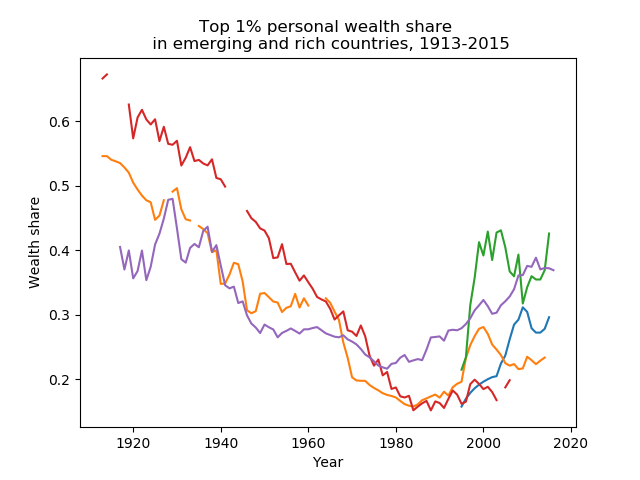

In [51]:
# Open new figure
plt.figure(1)

# Define data, from previously imported data frame
x = top1Percent['Year']
yCh = top1Percent['China']
yFr = top1Percent['France']
yRu = top1Percent['Russia']
yUK = top1Percent['UK']
yUS = top1Percent['US']

# Graph options
plt.title("Top 1% personal wealth share \n in emerging and rich countries, 1913-2015")
plt.ylabel("Wealth share")
plt.xlabel("Year")

# Generate graph
plt.plot(x, yCh, x, yFr, x, yRu, x, yUK, x, yUS)

Note that if you use a string of characters containing apostrophes and accents, you will need to add `u` before the string to tell Python which encoding to use (`u` is for Unicode).

We can change the appearance of the graph after having generated it. The command below shows you how to play with opacity (`alpha` parameter), colours and line patterns (`r--` for instance), marker shapes, and fillings.

To get more control on the appearance of the series, we will need to add them to the graph separately. Each series will be generated by its own `plt.plot(...)` command.


<IPython.core.display.Javascript object>


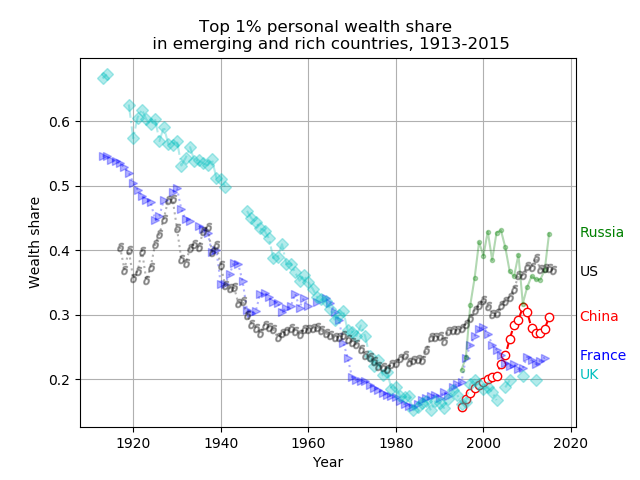

Text(2022, 0.36, 'US')

In [52]:
plt.figure(2)

# Graph options
plt.title("Top 1% personal wealth share \n in emerging and rich countries, 1913-2015")
plt.ylabel("Wealth share")
plt.xlabel("Year")
plt.grid()

# Generate graph
plt.plot(x, yCh, 'r--', marker='o', fillstyle='full', markerfacecolor='white')
plt.plot(x, yFr, 'b:', marker='>', alpha=0.3)
plt.plot(x, yRu, 'g-', marker='.', alpha=0.3)
plt.plot(x, yUK, 'c-.', marker='D', alpha=0.3)
plt.plot(x, yUS, 'k:', marker='$ \delta $', alpha=0.3)      # We use TeX to define the marker. This is a bit of a silly example here,
                                                            #   but we just want to show how to use TeX in a figure

# Label curves
plt.text(2022, 0.29, 'China', {'color': 'r', 'fontsize': 10}, ha="left")
plt.text(2022, 0.23, 'France', {'color': 'b', 'fontsize': 10}, ha="left")
plt.text(2022, 0.42, 'Russia', {'color': 'g', 'fontsize': 10}, ha="left")
plt.text(2022, 0.2, 'UK', {'color': 'c', 'fontsize': 10}, ha="left")
plt.text(2022, 0.36, 'US', {'color': 'k', 'fontsize': 10}, ha="left")


The colours, marker shapes and line styles provided by Matplotlib are easily accessible through the [matplotlib website](https://matplotlib.org/2.0.0/index.html). We include them here for future reference.

**Colours**
![Colours](https://matplotlib.org/2.0.0/_images/named_colors.png)

**Line styles**
![lines](https://matplotlib.org/_images/sphx_glr_line_styles_reference_001.png)

**Markers**
![unfilled markers](https://matplotlib.org/3.1.0/_images/sphx_glr_marker_reference_001.png)
![filled markers](https://matplotlib.org/3.1.0/_images/sphx_glr_marker_reference_002.png)
![mathtext markers](https://matplotlib.org/3.1.0/_images/sphx_glr_marker_reference_003.png)


#### 4.2. Creating several plots in one window

To create several plots in the same figure window we use the `subplot()` command. It takes as arguments:
* (1) The number of rows
* (2) The number of columns
* (3) The index of the sub-figure
Basically, the figure window is divided into **r** rows and **c** columns, and we give the sub-figures an index **i**. If we want to create a 3 by 1 table of figures, the subfigures `subplot` commands will look like `plt.subplot(31...)`. If one of the **r**, **c** or **i** arguments is greater than 10, then we will need to separate the arguments by commas.

<IPython.core.display.Javascript object>


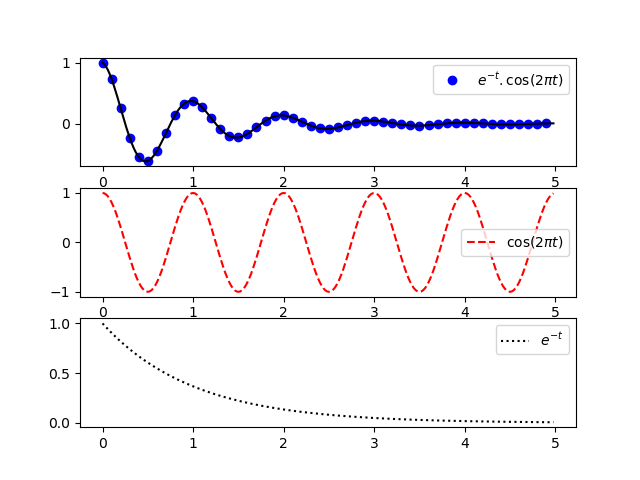

In [53]:
# We first define a function we are interested in plotting
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

# These are the two series we will use as x-coordinates in the plot
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# We open a new figure
plt.figure(3)
plt.subplot(311)
plt.plot(t1, f(t1), 'bo', label='$ e^{-t}.\cos(2 \pi t)$')
plt.plot(t2, f(t2), 'k')
plt.legend()

plt.subplot(312)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--', label='$ \cos(2 \pi t)$')
plt.legend()

plt.subplot(313)
plt.plot(t2, np.exp(-t2), 'k:', label='$ e^{-t}$')
plt.legend()


We can also display the figures with one of them having different dimensions than the others. In the example below, we define a 2 by 2 grid and then use the image indices (1 to 3) to position them on the grid. Indices start at 1 in the upper-left corner and increase to the right.

So to define 3 sub-figures with two at the top and a large one at the bottom, we need to define a grid with 2 rows (in all sub-figures `subplot()` commands) and either 1 or two columns depending on the width of the sub-figure. Indices will allow us to position them as we want.

<IPython.core.display.Javascript object>


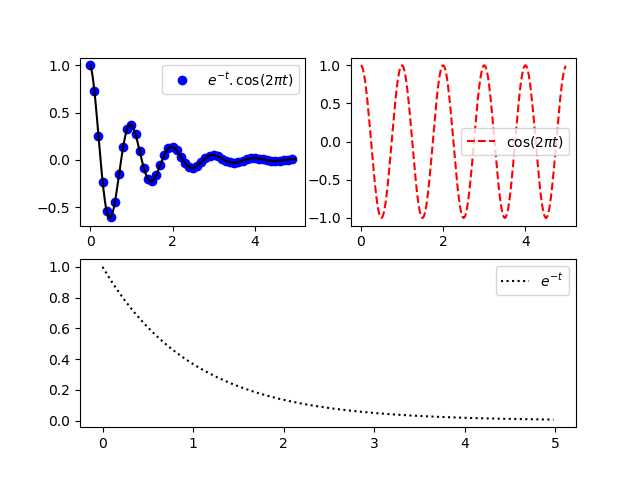

In [54]:
# We open a new figure

plt.figure(4)
plt.subplot(221) # in a 2*2 grid, this figure has index 1
plt.plot(t1, f(t1), 'bo', label='$ e^{-t}.\cos(2 \pi t)$')
plt.plot(t2, f(t2), 'k')
plt.legend()

plt.subplot(222) # in a 2*2 grid, this figure has index 2
plt.plot(t2, np.cos(2*np.pi*t2), 'r--', label='$ \cos(2 \pi t)$')
plt.legend()

plt.subplot(212) # in a 2*1 grid, this figure has index 2
plt.plot(t2, np.exp(-t2), 'k:', label='$ e^{-t}$')
plt.legend()

#### 4.3. 3D plots

Matplotlib is excellent at producing beautiful 3D plots. 

To generate a 3D plot, we need to import the `Axes3D` submodule and define the figure in slightly more abstract terms. For this, we use Python's object-oriented API (Application Programming Interface). So far, we have been creating graphs using a simpler, MATLAD-style API. This is convenient and it allowed us to do most things we were interested in, but this way of coding turns a blind eye on many other objects that are being created. Now, we create a figure canvas, and a set of axes explicitely. This requires some additional typing, but it allows us to add a third axis for instance.

See below how to plot a bivariate normal distribution.

<IPython.core.display.Javascript object>


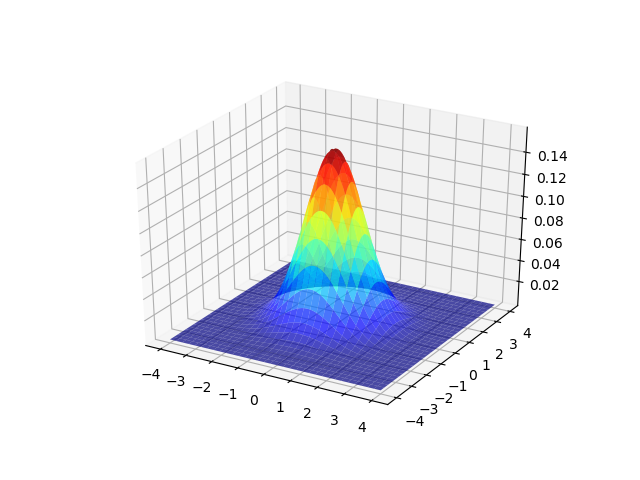

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from matplotlib import cm

x = np.linspace(-4, 4, 100)               # Defining the [-2, 2] by [-2, 2] measure of our pdf
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)                  # Creating a grid with the x, y coordinates created above                        

mu = np.array([ 0., 0.])                 # Defining means of the bivariate standard normal
sigma = np.array([[1., 0.], [0., 1.]])   # SD of the bivariate standard normal

# Putting X and Y into a 3 dimensional object (note: X and Y are 200*200 matrices and the third dimension is simply the number of such matrices, here two)
pos = np.zeros(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Defining the density distribution we will use
F = multivariate_normal(mu, sigma)

# Storing the densities in a Z vector
Z = F.pdf(pos)

# Plotting the results in 3D
fig = plt.figure(5)
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z,
                rstride=3, cstride=3,
                cmap=cm.jet,
                alpha=0.7)


We can now export our figure and close the figure windows we opened in order to de-clutter our memory. All vectorial and roster formats are supported.

In [ ]:
plt.savefig('H:\\exampleDataHandling.pdf')

plt.close(1)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

### 5. SciPy

SciPy is a powerful package for scientific computing. It builds on top of NumPy and allows us to perform the mathematical manipulations that would be required in a social science project: optimisation, integration, solving differential equations, finding solutions of polynomials, performing linear algebra operations, signal processing and some useful statistical functions. 

We will rarely use SciPy's extensive capabilities in this course, so we will not discuss it further here. But you will certainly use it in your own work.

### References

Datasets on top income shares come from **[Gabriel Zucman's website](http://gabriel-zucman.eu/)**.

**Saez, E and G. Zucman** (2019) "Progressive Wealth Taxation", *Brookings Papers on Economic Activity*, Fall 2019, forthcoming. [Link](http://gabriel-zucman.eu/files/SaezZucman2019BPEA.pdf).